# Introduction

- FirstAppOpen = Pertama kali aplikasi di buka
- ReadOnboarding = Tampilan singkat yang memuat konten aplikasi
- Sign Up = Pengguna Masuk menggunakan akun apple
- LoadTopic = Halaman yang memuat topik materi
- TopicChoosed = Topik materi yang dipilih
- LoadLearningPage = Halaman yang memuat topik materi
- SubTopicChoosed = Sub topik materi yang dipilih
- ReadMaterial = isi materi dari sub topik yang dipilih
- CorrectAnswerQuiz = Jumlah Jawaban yang benar dalam menjawab kuis materi
- FinishHoorayMaterial = Menyelesaikan sebuah materi
- ExcerciseChoosed = Latihan soal yang dipilih
- CorrectAnswersExcercise = Jumlah jawaban yang benar dalam menjawab soal latihan
- FinishHoorayExcercise = Menyelesaikan sebuah latihan soal

# Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

### Import data

In [2]:
df = pd.read_excel('data/Codr Data 2 Country.xlsx')

# 1.Data Profiling

In [3]:
df.head(5)

,Date,FirstAppOpen,ReadOnboarding,SignUp,LoadTopic,TopicChoosed,LoadLearningPage,SubTopicChoosed,ReadMaterial,CorrectAnswerQuiz,FinishHoorayMaterial,ExerciseChoosed,CorrectAnswerExercise,FinishHoorayExcercise
0,2022-04-26,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-04-27,2.0,4.0,1.0,3.0,2.0,2.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0
2,2022-04-28,6.0,11.0,3.0,8.0,8.0,8.0,12.0,12.0,25.0,12.0,6.0,3.0,12.0
3,2022-04-29,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-04-30,9.0,9.0,1.0,5.0,6.0,6.0,7.0,7.0,14.0,8.0,4.0,3.0,8.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   216 non-null    datetime64[ns]
 1   FirstAppOpen           216 non-null    float64       
 2   ReadOnboarding         216 non-null    float64       
 3   SignUp                 216 non-null    float64       
 4   LoadTopic              216 non-null    float64       
 5   TopicChoosed           216 non-null    float64       
 6   LoadLearningPage       216 non-null    float64       
 7   SubTopicChoosed        216 non-null    float64       
 8   ReadMaterial           216 non-null    float64       
 9   CorrectAnswerQuiz      216 non-null    float64       
 10  FinishHoorayMaterial   216 non-null    float64       
 11  ExerciseChoosed        216 non-null    float64       
 12  CorrectAnswerExercise  216 non-null    float64       
 13  Finis

incorrect data type, it should be numeric

In [5]:
df.isna().sum()

Date                     0
FirstAppOpen             0
ReadOnboarding           0
SignUp                   0
LoadTopic                0
TopicChoosed             0
LoadLearningPage         0
SubTopicChoosed          0
ReadMaterial             0
CorrectAnswerQuiz        0
FinishHoorayMaterial     0
ExerciseChoosed          0
CorrectAnswerExercise    0
FinishHoorayExcercise    0
dtype: int64

No longer has a null value

In [6]:
df.describe()

,FirstAppOpen,ReadOnboarding,SignUp,LoadTopic,TopicChoosed,LoadLearningPage,SubTopicChoosed,ReadMaterial,CorrectAnswerQuiz,FinishHoorayMaterial,ExerciseChoosed,CorrectAnswerExercise,FinishHoorayExcercise
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,2.870370,5.500000,1.337963,4.402778,4.972222,4.930556,5.546296,5.513889,9.402778,5.675926,3.967593,2.592593,5.675926
std,8.540565,9.278633,1.648578,4.789503,5.213504,5.204630,6.249665,6.234920,12.365736,7.866714,5.208568,3.691693,7.884431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,3.000000,2.500000,1.000000,3.000000
75%,2.250000,8.000000,2.000000,6.000000,6.000000,6.000000,8.000000,8.000000,13.250000,8.000000,5.250000,4.000000,8.000000
max,82.000000,84.000000,7.000000,54.000000,29.000000,29.000000,32.000000,32.000000,76.000000,50.000000,29.000000,21.000000,50.000000


Tidak ada nilai minus sehingga dapat dikatakan aman dari salah input

# 2.Data Cleansing

Data is clean,but inappropriate data type

In [26]:
df.head(5)

,Date,FirstAppOpen,ReadOnboarding,SignUp,LoadTopic,TopicChoosed,LoadLearningPage,SubTopicChoosed,ReadMaterial,CorrectAnswerQuiz,FinishHoorayMaterial,ExerciseChoosed,CorrectAnswerExercise,FinishHoorayExcercise,Year,Month,Day
1,2022-04-27,2.0,4.0,1.0,3.0,2.0,2.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0,2022,04,27
2,2022-04-28,6.0,11.0,3.0,8.0,8.0,8.0,12.0,12.0,25.0,12.0,6.0,3.0,12.0,2022,04,28
3,2022-04-29,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,04,29
4,2022-04-30,9.0,9.0,1.0,5.0,6.0,6.0,7.0,7.0,14.0,8.0,4.0,3.0,8.0,2022,04,30
5,2022-05-01,7.0,9.0,0.0,4.0,3.0,3.0,2.0,2.0,6.0,4.0,3.0,3.0,4.0,2022,05,1


In [27]:
# Mengganti Data type 
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

objectlist = df.select_dtypes(include='object').columns
for i in objectlist:
  df[i] = df[i].astype('int')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 1 to 215
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   215 non-null    datetime64[ns]
 1   FirstAppOpen           215 non-null    float64       
 2   ReadOnboarding         215 non-null    float64       
 3   SignUp                 215 non-null    float64       
 4   LoadTopic              215 non-null    float64       
 5   TopicChoosed           215 non-null    float64       
 6   LoadLearningPage       215 non-null    float64       
 7   SubTopicChoosed        215 non-null    float64       
 8   ReadMaterial           215 non-null    float64       
 9   CorrectAnswerQuiz      215 non-null    float64       
 10  FinishHoorayMaterial   215 non-null    float64       
 11  ExerciseChoosed        215 non-null    float64       
 12  CorrectAnswerExercise  215 non-null    float64       
 13  Finis

# 3.Explore Data Analysis (EDA)

In [29]:
# Menambahkan coloumn baru yaitu Year,Month dan Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [30]:
df.head(5)

,Date,FirstAppOpen,ReadOnboarding,SignUp,LoadTopic,TopicChoosed,LoadLearningPage,SubTopicChoosed,ReadMaterial,CorrectAnswerQuiz,FinishHoorayMaterial,ExerciseChoosed,CorrectAnswerExercise,FinishHoorayExcercise,Year,Month,Day
1,2022-04-27,2.0,4.0,1.0,3.0,2.0,2.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0,2022,4,27
2,2022-04-28,6.0,11.0,3.0,8.0,8.0,8.0,12.0,12.0,25.0,12.0,6.0,3.0,12.0,2022,4,28
3,2022-04-29,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,4,29
4,2022-04-30,9.0,9.0,1.0,5.0,6.0,6.0,7.0,7.0,14.0,8.0,4.0,3.0,8.0,2022,4,30
5,2022-05-01,7.0,9.0,0.0,4.0,3.0,3.0,2.0,2.0,6.0,4.0,3.0,3.0,4.0,2022,5,1


In [31]:
#timebound

print(df["Date"].min())
print(df["Date"].max())
print("The data is from April 26th, 2022 to September 27th, 2022")

2022-04-27 00:00:00
2022-11-27 00:00:00
The data is from April 26th, 2022 to September 27th, 2022


### Time Series Plot
> Dalam melakukan analisis dapat dilihat melalui plot dari beberapa feature tertentu. Beberapa plot yang tidak diperlukan tidak perlu di plot.

In [50]:
def makeplot(a):
    sns.lineplot(data = df, x = 'Date', y = a)
    plt.xticks(rotation=90)

In [57]:
df['Month'] = df['Date'].dt.strftime('%m')

,Month,FirstAppOpen
0,04,18.0
1,05,335.0
2,06,66.0
3,07,36.0
4,08,31.0
5,09,43.0
6,10,36.0
7,11,49.0


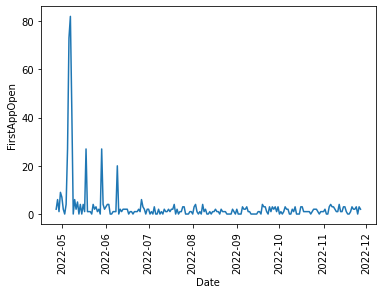

In [51]:
makeplot('FirstAppOpen')
df.groupby(['Month'], as_index=False)['FirstAppOpen'].sum()

,Month,TopicChoosed
0,04,17.0
1,05,169.0
2,06,176.0
3,07,116.0
4,08,91.0
5,09,135.0
6,10,140.0
7,11,230.0


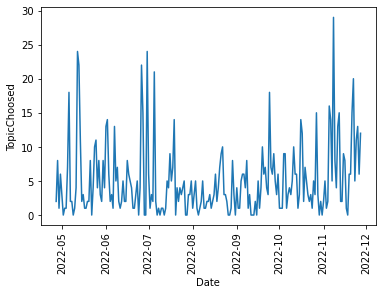

In [52]:
makeplot('TopicChoosed')
df.groupby(['Month'], as_index=False)['TopicChoosed'].sum()

,Month,SubTopicChoosed
0,04,20.0
1,05,175.0
2,06,187.0
3,07,132.0
4,08,103.0
5,09,176.0
6,10,168.0
7,11,237.0


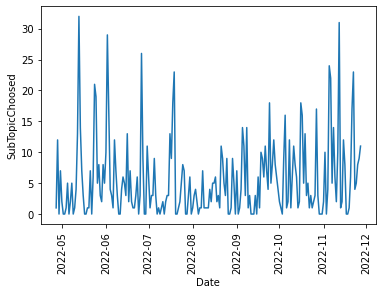

In [53]:
makeplot('SubTopicChoosed')
df.groupby(['Month'], as_index=False)['SubTopicChoosed'].sum()

,Month,ReadMaterial
0,04,20.0
1,05,175.0
2,06,187.0
3,07,132.0
4,08,102.0
5,09,176.0
6,10,162.0
7,11,237.0


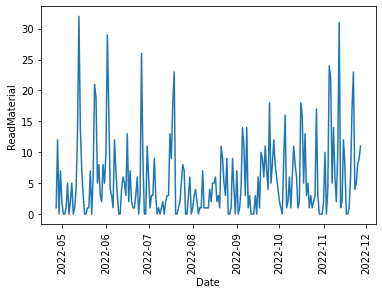

In [54]:
makeplot('ReadMaterial')
df.groupby(['Month'], as_index=False)['ReadMaterial'].sum()

,Month,CorrectAnswerQuiz
0,04,42.0
1,05,278.0
2,06,216.0
3,07,229.0
4,08,167.0
5,09,332.0
6,10,313.0
7,11,454.0


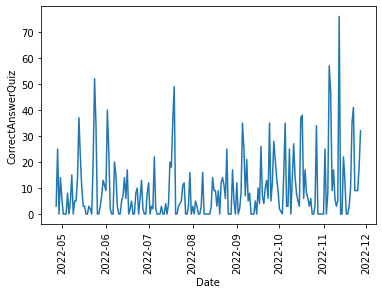

In [55]:
makeplot('CorrectAnswerQuiz')
df.groupby(['Month'], as_index=False)['CorrectAnswerQuiz'].sum()

,Month,FinishHoorayMaterial
0,04,21.0
1,05,180.0
2,06,130.0
3,07,147.0
4,08,96.0
5,09,197.0
6,10,172.0
7,11,283.0


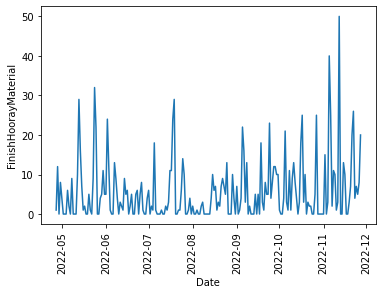

In [56]:
makeplot('FinishHoorayMaterial')
df.groupby(['Month'], as_index=False)['FinishHoorayMaterial'].sum()

,Month,ExerciseChoosed
0,04,10.0
1,05,139.0
2,06,81.0
3,07,95.0
4,08,71.0
5,09,127.0
6,10,128.0
7,11,206.0


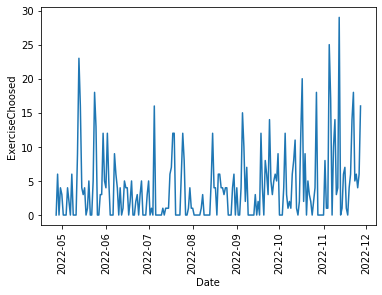

In [58]:
makeplot('ExerciseChoosed')
df.groupby(['Month'], as_index=False)['ExerciseChoosed'].sum()

,Month,CorrectAnswerExercise
0,04,6.0
1,05,96.0
2,06,57.0
3,07,66.0
4,08,42.0
5,09,88.0
6,10,77.0
7,11,128.0


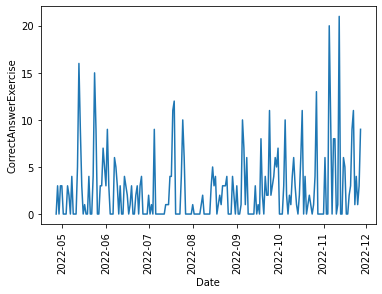

In [59]:
makeplot('CorrectAnswerExercise')
df.groupby(['Month'], as_index=False)['CorrectAnswerExercise'].sum()

,Month,FinishHoorayExcercise
0,04,21.0
1,05,181.0
2,06,130.0
3,07,147.0
4,08,95.0
5,09,197.0
6,10,172.0
7,11,283.0


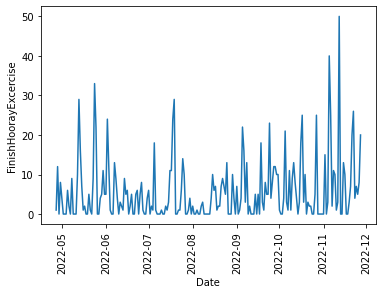

In [60]:
makeplot('FinishHoorayExcercise')
df.groupby(['Month'], as_index=False)['FinishHoorayExcercise'].sum()

In [43]:
summary_data = df.groupby(['Month'])['FirstAppOpen', 'TopicChoosed', 'SubTopicChoosed','ReadMaterial','CorrectAnswerQuiz','FinishHoorayMaterial','ExerciseChoosed','CorrectAnswerExercise','FinishHoorayExcercise'].sum()
summary_data['%'] = round((summary_data['FinishHoorayExcercise'] / summary_data['ReadMaterial']) * 100,2)
summary_data

,FirstAppOpen,TopicChoosed,SubTopicChoosed,ReadMaterial,CorrectAnswerQuiz,FinishHoorayMaterial,ExerciseChoosed,CorrectAnswerExercise,FinishHoorayExcercise,%
Month,,,,,,,,,,
04,18.0,17.0,20.0,20.0,42.0,21.0,10.0,6.0,21.0,105.00
05,335.0,169.0,175.0,175.0,278.0,180.0,139.0,96.0,181.0,103.43
06,66.0,176.0,187.0,187.0,216.0,130.0,81.0,57.0,130.0,69.52
07,36.0,116.0,132.0,132.0,229.0,147.0,95.0,66.0,147.0,111.36
08,31.0,91.0,103.0,102.0,167.0,96.0,71.0,42.0,95.0,93.14
09,43.0,135.0,176.0,176.0,332.0,197.0,127.0,88.0,197.0,111.93
10,36.0,140.0,168.0,162.0,313.0,172.0,128.0,77.0,172.0,106.17
11,49.0,230.0,237.0,237.0,454.0,283.0,206.0,128.0,283.0,119.41
